In [ ]:
Test Environment for Generative AI classroom labs

In [5]:
#Write the prompt to generate the said code and test it in the JupyterLite environment. For verification of appropriate loading, include a step for printing the first 5 values of the loaded dataframe.
#Write a Python code that can perform the following tasks.
#1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
#2. Print the first 5 rows of the dataframe to verify correct loading.

# Install necessary libraries
%pip install seaborn
import piplite
# Import pandas library
import pandas as pd

# Install additional required libraries
await piplite.install(['nbformat', 'plotly'])
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
from pyodide.http import pyfetch

# Function to download the CSV file
async def download(URL, filename):
    response = await pyfetch(URL)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

# Define file path
path = URL

# Download the file
await download(path, "ford.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('ford.csv')

# Print the first 5 rows of the DataFrame to verify loading
df.head()


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [7]:
#Identifies the columns with missing values and fills the blank cells with average value of the columns.
#Identifies and drops the duplicate entries from the data.
#Write a python code that performs the following tasks:
#1. Identify the columns of a data frame with missing values.
#2. Replace the missing values thus identified with mean value of the column.
#3. Deletes the duplicate entries from the data frame.

import pandas as pd

# Sample DataFrame (replace with your DataFrame)
df = pd.read_csv('ford.csv')  # Assuming 'ford.csv' is already loaded

# 1. Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]

# 2. Replace missing values with the mean of the respective column
for column in missing_columns:
    df[column] = df[column].fillna(df[column].mean())  # Reassign the filled column back to the DataFrame

# 3. Remove duplicate rows
df = df.drop_duplicates()  # Reassign to avoid the inplace warning

# Optionally, print the cleaned DataFrame to verify the changes
print("Cleaned DataFrame:")
print(df.head())



Cleaned DataFrame:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [10]:
#Identify the 5 attributes that have the highest correlation with the price parameter.
#Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

import pandas as pd

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with the actual path to your dataset

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation values of all features with the target attribute 'Price'
price_corr = correlation_matrix['price'].dropna()

# Sort the correlations in descending order and exclude 'Price' itself
top_5_corr = price_corr.drop('price').sort_values(ascending=False).head(5)

# Print the top 5 attributes with the highest correlation to 'Price'
print("Top 5 attributes with the highest correlation with Price:")
print(top_5_corr)



Top 5 attributes with the highest correlation with Price:
year          0.636009
engineSize    0.411178
tax           0.406895
mpg          -0.346419
mileage      -0.530659
Name: price, dtype: float64


In [11]:
#Count the number of cars under each unique value of fuelType attribute.
#Write a python code that counts the number of entries in a dataframe with each unique value of a specific attribute.

import pandas as pd

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with the actual file path

# Count the number of occurrences of each unique fuel type
fuel_counts = df['fuelType'].value_counts()

# Print the results
print("Number of cars under each fuel type:")
print(fuel_counts)


Number of cars under each fuel type:
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


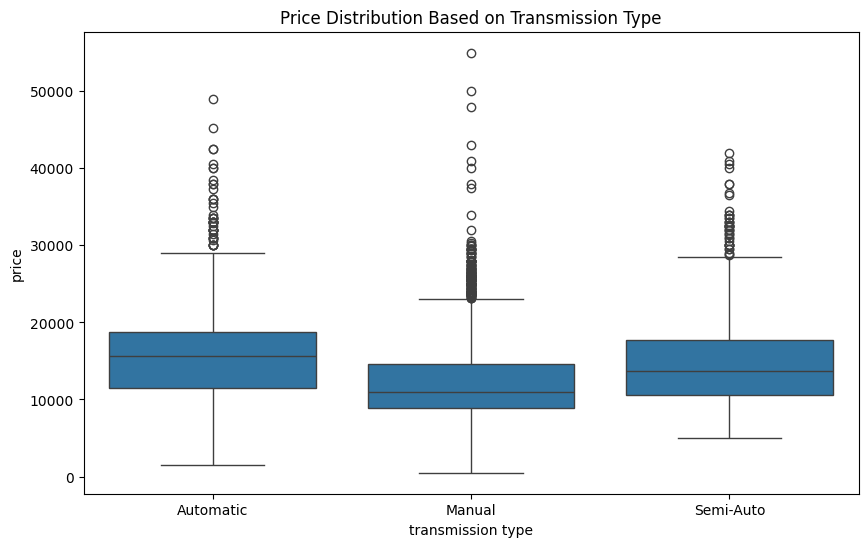

In [12]:
#Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.
#Write a python code that creates a Seaborn box plot between a source and target attributes of a dataframe.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with the actual file path

# Create a box plot for 'Price' based on 'Transmission' type
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Set plot labels and title
plt.xlabel('transmission type')
plt.ylabel('price')
plt.title('Price Distribution Based on Transmission Type')

# Show the plot
plt.show()


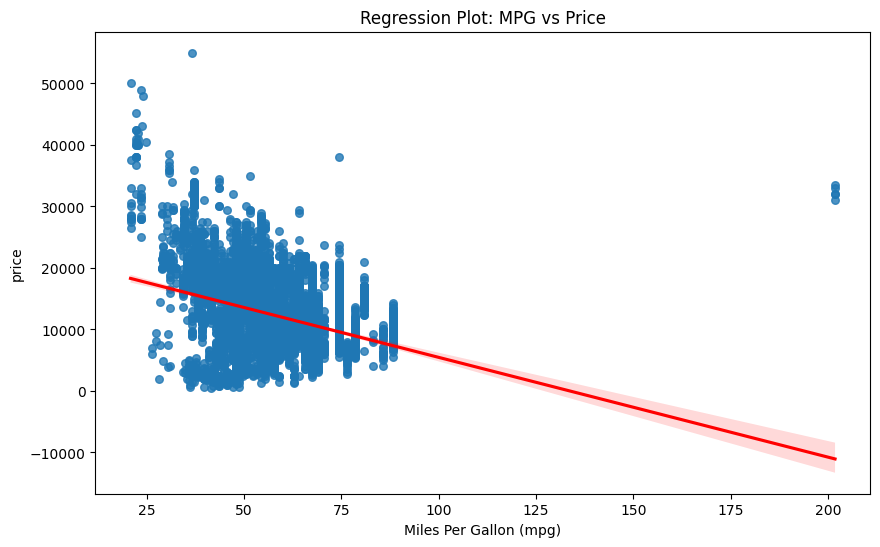

In [13]:
#Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
#Write a python code that creates a regression plot between a source attribute and a target attribute.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with the actual file path

# Check if 'mpg' column exists in the dataset
if 'mpg' in df.columns:
    # Create a regression plot for 'mpg' vs 'Price'
    plt.figure(figsize=(10, 6))
    sns.regplot(x='mpg', y='price', data=df, scatter_kws={'s': 30}, line_kws={'color': 'red'})

    # Set plot labels and title
    plt.xlabel('Miles Per Gallon (mpg)')
    plt.ylabel('price')
    plt.title('Regression Plot: MPG vs Price')

    # Show the plot
    plt.show()
else:
    print("Column 'mpg' not found in the dataset.")


R² Score: 0.1325
Mean Squared Error: 19441984.66


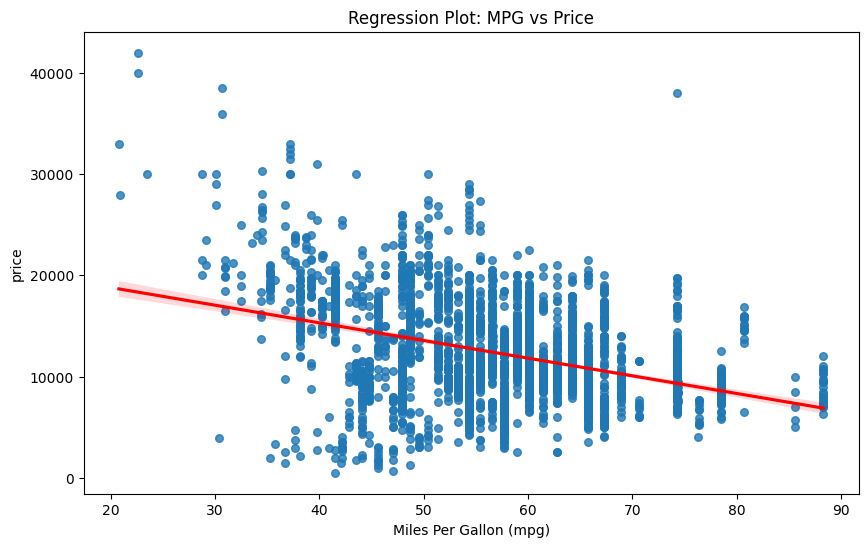

In [14]:
#Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.
#Write a python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with actual file path

# Check if 'mpg' and 'Price' columns exist in the dataset
if 'mpg' in df.columns and 'price' in df.columns:
    # Drop rows with missing values in the relevant columns
    df_clean = df.dropna(subset=['mpg', 'price'])

    # Selecting the feature (independent variable) and target (dependent variable)
    X = df_clean[['mpg']]  # Independent variable
    y = df_clean['price']   # Dependent variable

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.2f}')

    # Plot the regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X_test, y=y_test, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.xlabel('Miles Per Gallon (mpg)')
    plt.ylabel('price')
    plt.title('Regression Plot: MPG vs Price')
    plt.show()

else:
    print("Required columns ('mpg' or 'Price') not found in the dataset.")


R² Score: 0.7298
Mean Squared Error: 6125901.23


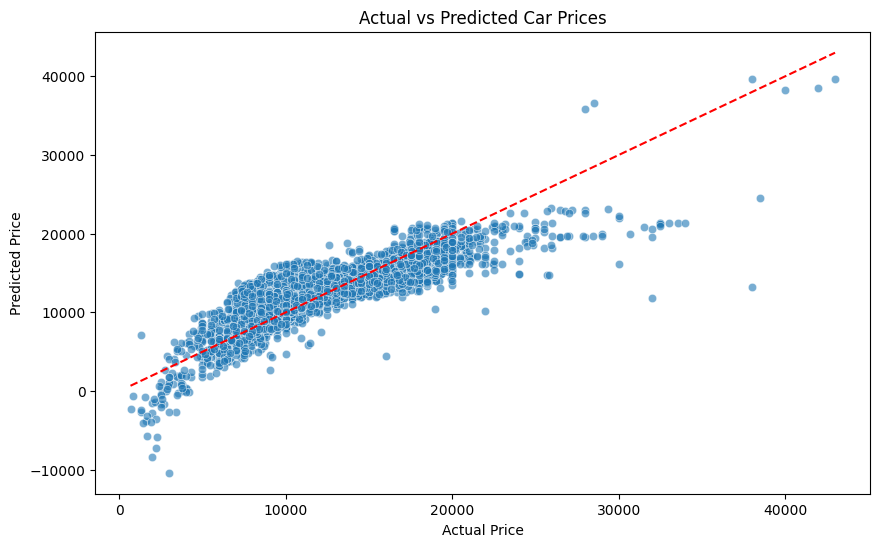

In [15]:
#Fit a linear regression model to predict the price using the following set of features.
#year, mileage, tax, mpg and engineSize.
#Calculate the R^2 and MSE values for this model.
#Write a python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with actual file path

# Check if required columns exist in the dataset
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Drop rows with missing values in relevant columns
    df_clean = df.dropna(subset=required_columns)

    # Selecting features (independent variables) and target (dependent variable)
    X = df_clean[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = df_clean['price']  # Target variable

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.2f}')

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Car Prices')
    plt.show()

else:
    print(f"Missing columns in dataset: {missing_columns}")


R² Score: 0.7557
Mean Squared Error: 5539203.17


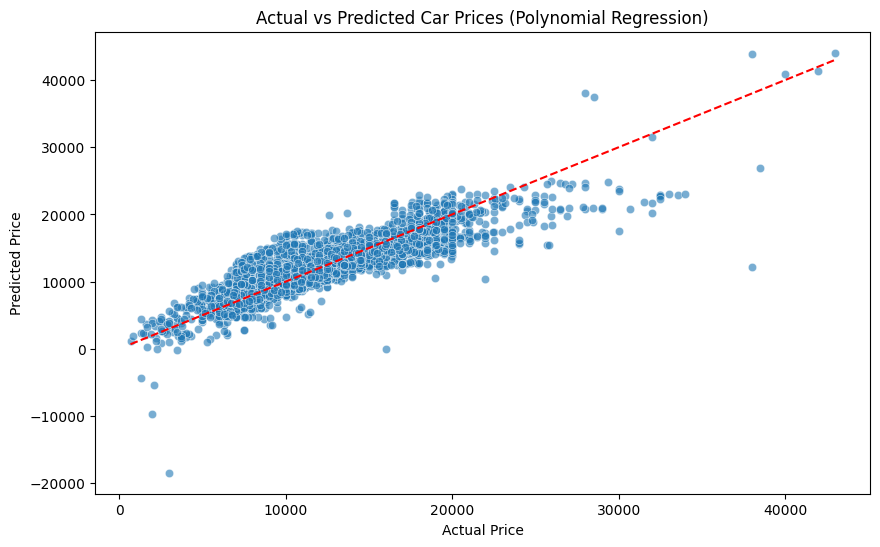

In [16]:
#For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.
#Write a python code that can perform the following tasks.

#1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
#2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
#3. Evaluate the R^2 and MSE values for the trained model.   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with actual file path

# Check if required columns exist in the dataset
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Drop rows with missing values in relevant columns
    df_clean = df.dropna(subset=required_columns)

    # Selecting features (independent variables) and target (dependent variable)
    X = df_clean[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = df_clean['price']  # Target variable

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with:
    # 1. StandardScaler: Normalize features
    # 2. PolynomialFeatures (degree=2): Add interaction terms
    # 3. LinearRegression: Fit a linear model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', LinearRegression())
    ])

    # Fit the pipeline model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.2f}')

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Car Prices (Polynomial Regression)')
    plt.show()

else:
    print(f"Missing columns in dataset: {missing_columns}")


R² Score: 0.7298
Mean Squared Error: 6125901.76


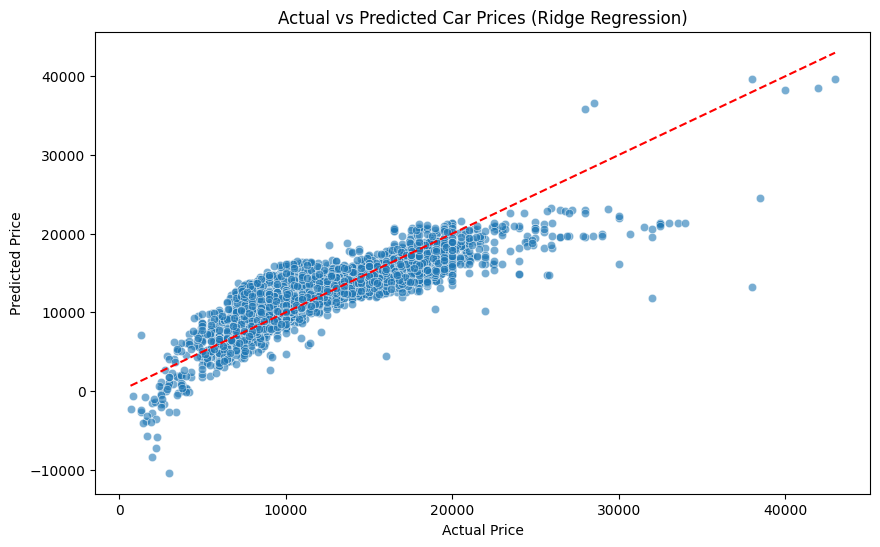

In [19]:
#For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
#Write a python code that can perform the following tasks.

#1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
#2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
#3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with actual file path

# Check if required columns exist in the dataset
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Drop rows with missing values in relevant columns
    df_clean = df.dropna(subset=required_columns)

    # Selecting features (independent variables) and target (dependent variable)
    X = df_clean[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = df_clean['price']  # Target variable

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the Ridge regression model with alpha=0.1
    ridge_model = Ridge(alpha=0.1)
    ridge_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = ridge_model.predict(X_test_scaled)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.2f}')

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Car Prices (Ridge Regression)')
    plt.show()

else:
    print(f"Missing columns in dataset: {missing_columns}")


R² Score: 0.7557
Mean Squared Error: 5539190.82


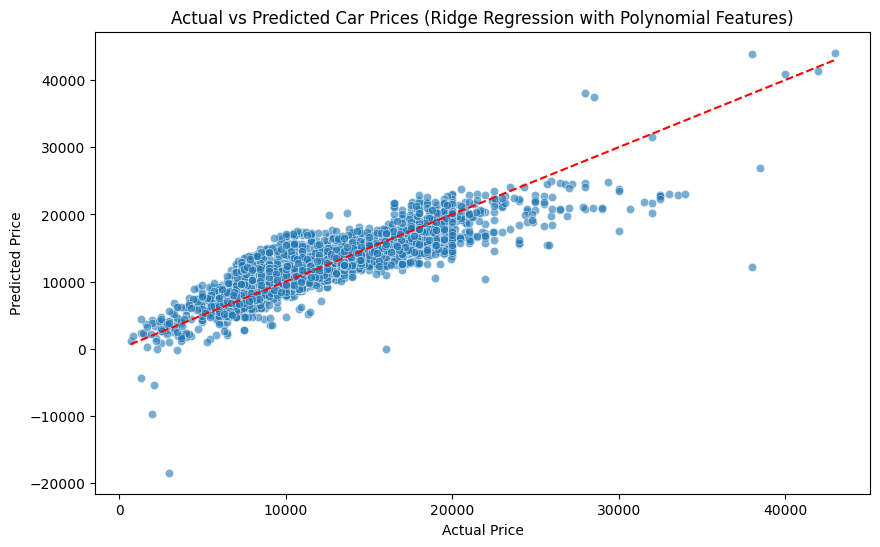

In [20]:
#Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.
#Write a python code that can perform the following tasks.

#1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
#2. Apply second degree polynomial scaling to the training and testing data.
#3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
#4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with actual file path

# Check if required columns exist in the dataset
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Drop rows with missing values in relevant columns
    df_clean = df.dropna(subset=required_columns)

    # Selecting features (independent variables) and target (dependent variable)
    X = df_clean[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = df_clean['price']  # Target variable

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply second-degree polynomial transformation
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Create and fit the Ridge regression model with alpha=0.1
    ridge_model = Ridge(alpha=0.1)
    ridge_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = ridge_model.predict(X_test_poly)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.2f}')

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Car Prices (Ridge Regression with Polynomial Features)')
    plt.show()

else:
    print(f"Missing columns in dataset: {missing_columns}")


Best alpha value found: 100
R² Score: 0.7560
Mean Squared Error: 5531361.78


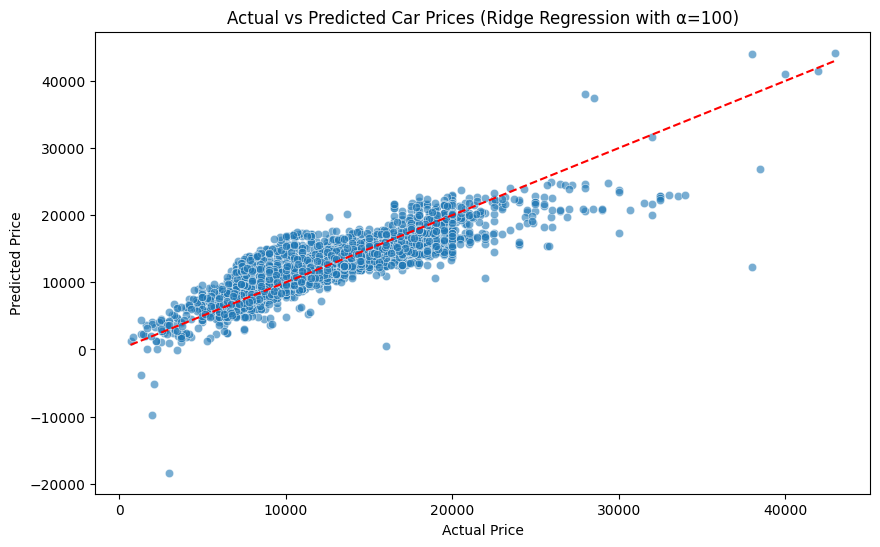

In [21]:
#In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.
#Write a python code that can perform the following tasks.

#1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
#2. Apply second degree polynomial scaling to the training and testing data.
#3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
#4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('ford.csv')  # Replace with actual file path

# Check if required columns exist in the dataset
required_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Drop rows with missing values in relevant columns
    df_clean = df.dropna(subset=required_columns)

    # Selecting features (independent variables) and target (dependent variable)
    X = df_clean[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
    y = df_clean['price']  # Target variable

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply second-degree polynomial transformation
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Define the Ridge regression model
    ridge_model = Ridge()

    # Define parameter grid for alpha values
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

    # Perform Grid Search with 4-fold cross-validation
    grid_search = GridSearchCV(ridge_model, param_grid, cv=4, scoring='r2')
    grid_search.fit(X_train_poly, y_train)

    # Get the best alpha value
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha value found: {best_alpha}")

    # Train Ridge Regression using the best alpha
    best_ridge = Ridge(alpha=best_alpha)
    best_ridge.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = best_ridge.predict(X_test_poly)

    # Calculate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Print the results
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Squared Error: {mse:.2f}')

    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Actual vs Predicted Car Prices (Ridge Regression with α={best_alpha})')
    plt.show()

else:
    print(f"Missing columns in dataset: {missing_columns}")
